In [159]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

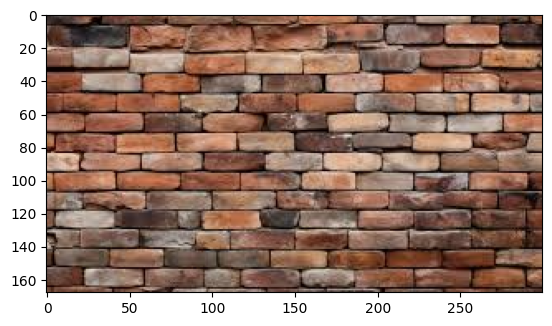

(168, 300, 3)


In [160]:
img=cv.imread("./pattern2.jpg")
img=cv.cvtColor(img,cv.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()
print(img.shape)

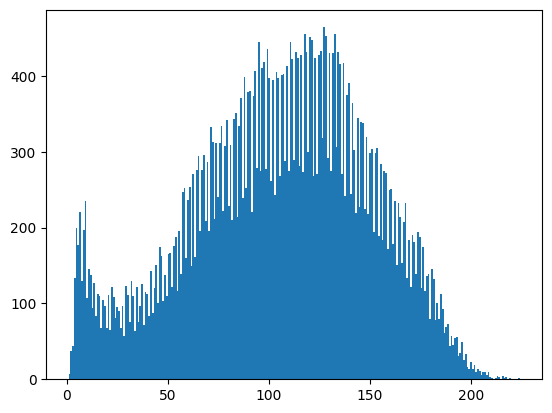

In [161]:
vals=img.mean(axis=2).flatten()
plt.hist(vals,bins=255)
plt.show()

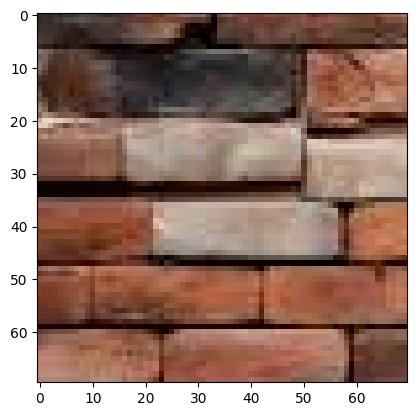

(70, 70, 3)


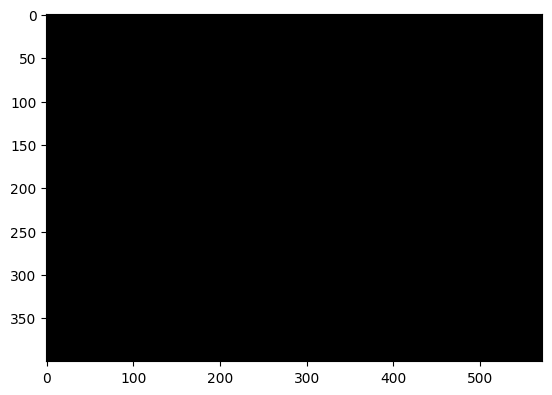

(400, 572, 3)


In [162]:
synthesis_img_size=(400,572,3)
block_size=(70,70,3)

synthesis_img=np.zeros(synthesis_img_size).astype(np.uint8)
E_synthesis=np.zeros(synthesis_img_size).astype(np.uint8)

plt.imshow(img[:block_size[0],:block_size[1]])
plt.show()
print(img[:block_size[0],:block_size[1]].shape)
plt.imshow(synthesis_img)
plt.show()
print(synthesis_img.shape)

Tiling blocks next to each other

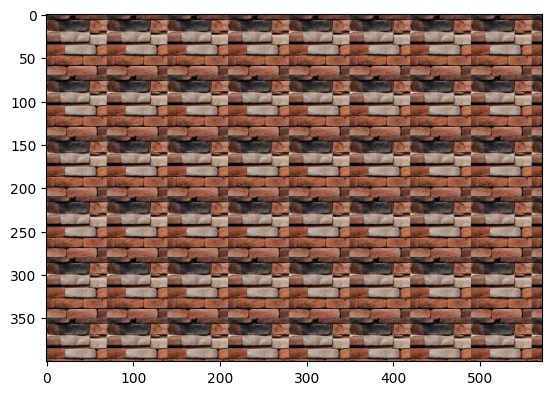

In [163]:
for i in range(0,synthesis_img.shape[0]):
    for j in range(0,synthesis_img.shape[1]):
        synthesis_img[i,j]=img[i%block_size[0],j%block_size[1]]
plt.imshow(synthesis_img)
plt.show()

Introducing a bit of randomness

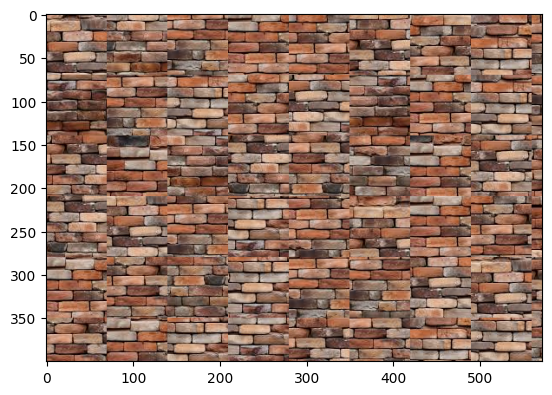

In [164]:
synthesis_img=np.zeros(synthesis_img_size).astype(np.uint8)

for i in range(0,synthesis_img.shape[0],block_size[0]):
    for j in range(0,synthesis_img.shape[1],block_size[1]):
        offset=(np.random.randint(0,img.shape[0]-block_size[0]),np.random.randint(0,img.shape[1]-block_size[1]))
        for k in range(block_size[0]):
            if i+k<synthesis_img.shape[0]:
                for l in range(block_size[1]):
                    if(j+l<synthesis_img.shape[1]):
                        synthesis_img[i+k,j+l]=img[offset[0]+k,offset[1]+l]
                    else:
                        break
            else:
                break
plt.imshow(synthesis_img)
plt.show()

Overlap one pixel row/column of each block

In [ ]:
synthesis_img=np.zeros(synthesis_img_size).astype(np.uint8)
E_synthesis=np.zeros(synthesis_img_size).astype(np.uint8)

overlap=2
for i in range(0,synthesis_img.shape[0],block_size[0]-overlap):
    for j in range(0,2*synthesis_img.shape[1],block_size[1]-overlap):
        offset=(np.random.randint(0,img.shape[0]-block_size[0]),np.random.randint(0,img.shape[1]-block_size[1]))
        for k in range(block_size[0]):
            if i+k<synthesis_img.shape[0]:
                for l in range(block_size[1]):
                    if(j+l<synthesis_img.shape[1]):
                        difference=synthesis_img[i+k,j+l].copy()
                        synthesis_img[i+k,j+l]=img[offset[0]+k,offset[1]+l]
                        if(k>=block_size[0]-overlap or l>=block_size[1]-overlap):
                            E_synthesis[i+k,j+l]=(
                                ((difference-synthesis_img[i+k,j+l])**2)+\
                                np.min(
                                    [E_synthesis[i+k-1,j+l-1],
                                     E_synthesis[i+k-1,j+l],
                                     E_synthesis[i+k-1,j+l+1] if j+l+1<synthesis_img.shape[1] else E_synthesis[i+k-1,j+l]],
                                    axis=0
                                )
                            )
                            # print(E_synthesis[i+k-1,j+l-1])
                            # print(E_synthesis[i+k-1,j+l])
                            # print(E_synthesis[i+k-1,j+l+1])
                            # print(np.min([E_synthesis[i+k-1,j+l-1],E_synthesis[i+k-1,j+l]],axis=0))
                            # print()
                    else:
                        break
            else:
                break
plt.imshow(synthesis_img)
plt.show()
plt.imshow(E_synthesis)
plt.show()